In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
img= cv2.imread('Valid_tumor.jpg')
img1=cv2.imread('Invalid_tumor.jpg')
# print("Shape of the image", img.shape)
# crop = img[50:180, 100:300]

# cv2.imshow('original', img)
# cv2.imshow('cropped', crop)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

height = 300
width = 300
dim = (width, height)
img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)
#img1 = cv2.resize(img1, dim, interpolation=cv2.INTER_LINEAR)

# resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)
# print(img.shape)
# print(img1.shape)
# images=np.concatenate((img,img1),axis=1)
# # cv2.imshow("Images",images)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

In [ ]:
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

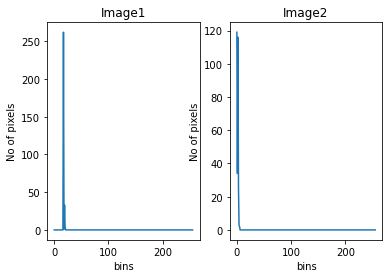

In [11]:
hist=cv2.calcHist(gray_img,[0],None,[256],[0,256])
hist1=cv2.calcHist(gray_img1,[0],None,[256],[0,256])
plt.subplot(121)
plt.title("Image1")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist)
plt.subplot(122)
plt.title("Image2")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist1)
plt.show()

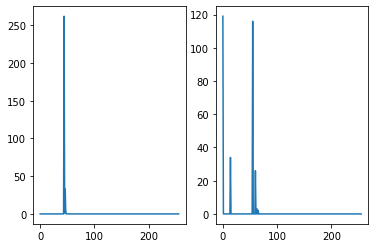

In [12]:
gray_img_eqhist=cv2.equalizeHist(gray_img)
gray_img1_eqhist=cv2.equalizeHist(gray_img1)
hist=cv2.calcHist(gray_img_eqhist,[0],None,[256],[0,256])
hist1=cv2.calcHist(gray_img1_eqhist,[0],None,[256],[0,256])
plt.subplot(121)
plt.plot(hist)
plt.subplot(122)
plt.plot(hist1)
plt.show()

In [14]:
eqhist_images=np.concatenate((gray_img_eqhist,gray_img1_eqhist),axis=1)
# cv2.imshow("Images",eqhist_images)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [17]:
gray_image = cv2.imread('Valid_tumor.jpg',0)
gray_image1 = cv2.imread('Invalid_tumor.jpg',0)

height = 300
width = 300
dim = (width, height)
gray_image = cv2.resize(gray_image, dim, interpolation=cv2.INTER_LINEAR)
gray_image1 = cv2.resize(gray_image1, dim, interpolation=cv2.INTER_LINEAR)

# resize image
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)
ret,thresh1 = cv2.threshold(gray_image,0, 255,  cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret,thresh2 = cv2.threshold(gray_image1,0, 255,  cv2.THRESH_BINARY+cv2.THRESH_OTSU)

cv2.imwrite('rect.jpeg',np.concatenate((thresh1,thresh2),axis=1))

True

In [18]:
clahe=cv2.createCLAHE(clipLimit=40)
gray_img_clahe=clahe.apply(gray_img_eqhist)
gray_img1_clahe=clahe.apply(gray_img1_eqhist)
images=np.concatenate((gray_img_clahe,gray_img1_clahe),axis=1)
cv2.imshow("Images",images)


QObject::moveToThread: Current thread (0x56385128c8d0) is not the object's thread (0x56385199b380).
Cannot move to target thread (0x56385128c8d0)

QObject::moveToThread: Current thread (0x56385128c8d0) is not the object's thread (0x56385199b380).
Cannot move to target thread (0x56385128c8d0)

QObject::moveToThread: Current thread (0x56385128c8d0) is not the object's thread (0x56385199b380).
Cannot move to target thread (0x56385128c8d0)

QObject::moveToThread: Current thread (0x56385128c8d0) is not the object's thread (0x56385199b380).
Cannot move to target thread (0x56385128c8d0)

QObject::moveToThread: Current thread (0x56385128c8d0) is not the object's thread (0x56385199b380).
Cannot move to target thread (0x56385128c8d0)

QObject::moveToThread: Current thread (0x56385128c8d0) is not the object's thread (0x56385199b380).
Cannot move to target thread (0x56385128c8d0)

QObject::moveToThread: Current thread (0x56385128c8d0) is not the object's thread (0x56385199b380).
Cannot move to tar

In [11]:
img= cv2.imread('Valid_tumor.jpg')

In [ ]:
plt.imshow(img)

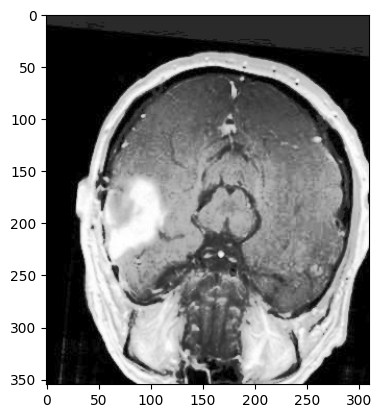

In [9]:
#since this is a colour image we have to apply
#the histogram equalization on each of the three channels separately
#cv2.split will return the three channels in the order B, G, R


b,g,r = cv2.split(img)

#apply hist equ on the three channels separately
b = cv2.equalizeHist(b)
g = cv2.equalizeHist(g)
r = cv2.equalizeHist(r)

#merge all the three channels
equ = cv2.merge((b,g,r))

#convert it to RGB to visualize
equ = cv2.cvtColor(equ,cv2.COLOR_BGR2RGB)
plt.imshow(equ)

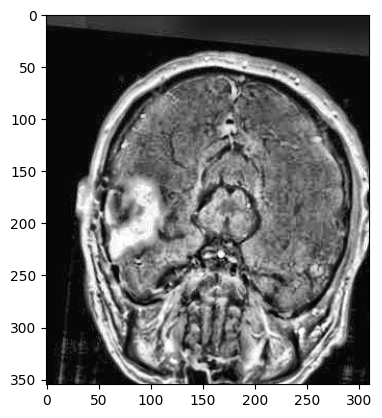

In [10]:
#do the same as we did for histogram equalization
#set the clip value and the gridsize changing these values will give different output
# from google.colab.patches import cv2_imshow

clahe = cv2.createCLAHE(clipLimit=6, \
                    tileGridSize=(16,16))

#split the three channels
b,g,r = cv2.split(img)

#apply CLAHE on the three channels separately
b = clahe.apply(b)
g = clahe.apply(g)
r = clahe.apply(r)

#merge the three channels
bgr = cv2.merge((b,g,r))

#convert to RGB and plot
cl = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB);
plt.imshow(cl)
# cv2_imshow(cl)

In [11]:
#detect edges

imgc = cl.copy() 

edged = cv2.Canny(cl, 10, 250)
#perform dilation
edged = cv2.dilate(edged, None, iterations=2)

(cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
c = max(cnts, key=cv2.contourArea)
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])
new_image = imgc[extTop[1]:extBot[1], extLeft[0]:extRight[0]]


    

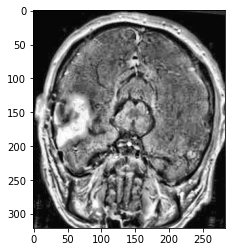

In [20]:
plt.imshow(new_image)
